In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas as pd
import seaborn as sns
import sklearn 

# Предсказание жанра музыки
    В данной задаче необходимо использовать метод ближайших соседей для предсказания жанра музыки
    по метрическим характеристикам.
    

# Загрузка данных

In [2]:
url = "https://raw.githubusercontent.com/SamvelNalchajyan/MachineLearning22_1/main/music_genre.csv"
data_raw = pd.read_csv(url)
data_raw.shape

(50005, 18)

In [3]:
data_raw.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [4]:
data_raw.tail()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
50000,58878.0,BEXEY,GO GETTA,59.0,0.03340,0.913,-1.0,0.574,0.0,C#,0.119,-7.022,Major,0.2980,98.02799999999999,4-Apr,0.330,Hip-Hop
50001,43557.0,Roy Woods,Drama (feat. Drake),72.0,0.15700,0.709,251860.0,0.362,0.0,B,0.109,-9.814,Major,0.0550,122.04299999999999,4-Apr,0.113,Hip-Hop
50002,39767.0,Berner,Lovin' Me (feat. Smiggz),51.0,0.00597,0.693,189483.0,0.763,0.0,D,0.143,-5.443,Major,0.1460,131.079,4-Apr,0.395,Hip-Hop
50003,57944.0,The-Dream,Shawty Is Da Shit,65.0,0.08310,0.782,262773.0,0.472,0.0,G,0.106,-5.016,Minor,0.0441,75.88600000000001,4-Apr,0.354,Hip-Hop
50004,63470.0,Naughty By Nature,Hip Hop Hooray,67.0,0.10200,0.862,267267.0,0.642,0.0,F#,0.272,-13.652,Minor,0.1010,99.20100000000001,4-Apr,0.765,Hip-Hop


## Признаки:
    instance_id - уникальный номер каждой композиции
    artist_name - имя исполнителя
    track_name - название композиции 
    popularity - мера популярности 
    acousticness - акустичность 
    danceability - мера танцевальности
    duration_ms - длительность в миллисекундах
    energy - энегрия
    instrumentalness - мера инструментальности
    key - музыкальный ключ
    liveness - мера живости 
    loudness - громкость 
    mode - тональный лад
    speechiness	- речь
    tempo - темп
    obtained_date - дата
    valence - валентность музыки
    
## Классы:
    Alternative
    Anime
    Blues
    Classical
    Country
    Electronic
    Hip-Hop
    Jazz
    Rap
    Rock

# Обработка пропущенных значений

In [5]:
data_raw.isna().sum() 

instance_id         5
artist_name         5
track_name          5
popularity          5
acousticness        5
danceability        5
duration_ms         5
energy              5
instrumentalness    5
key                 5
liveness            5
loudness            5
mode                5
speechiness         5
tempo               5
obtained_date       5
valence             5
music_genre         5
dtype: int64

In [6]:
data_raw = data_raw.dropna()
data_raw.isna().sum()

instance_id         0
artist_name         0
track_name          0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
obtained_date       0
valence             0
music_genre         0
dtype: int64

In [7]:
data_raw.shape

(50000, 18)

# Борьба с выбросами

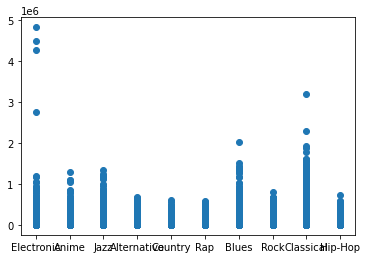

In [8]:
plt.scatter(data_raw['music_genre'], data_raw['duration_ms'])
pass

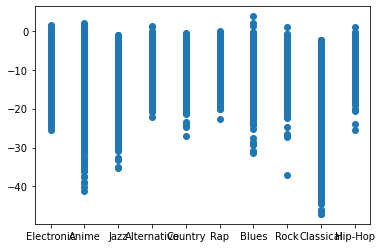

In [9]:
plt.scatter(data_raw['music_genre'], data_raw['loudness'])
pass

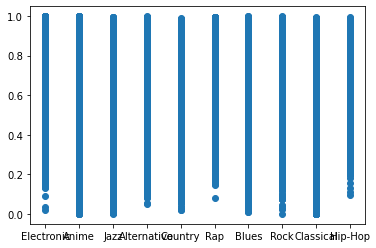

In [10]:
plt.scatter(data_raw['music_genre'], data_raw['energy'])
pass

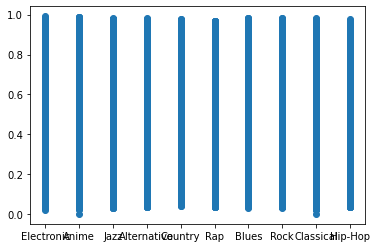

In [11]:
plt.scatter(data_raw['music_genre'], data_raw['valence'])
pass

In [12]:
data_raw['duration_ms'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005        -1.000
0.010        -1.000
0.050        -1.000
0.100     39473.200
0.500    219281.000
0.900    335268.300
0.950    401497.050
0.990    596034.080
0.995    747053.845
Name: duration_ms, dtype: float64

In [13]:
data_raw['duration_ms'].quantile([.01,.05,.06,.07,.08,.09,.095,0.098,.099,.1])

0.010       -1.000
0.050       -1.000
0.060       -1.000
0.070       -1.000
0.080       -1.000
0.090       -1.000
0.095       -1.000
0.098       -1.000
0.099    29929.287
0.100    39473.200
Name: duration_ms, dtype: float64

In [14]:
rows_to_drop = data_raw[
    (data_raw['duration_ms'] < data_raw['duration_ms'].quantile(0.099)) | 
    (data_raw['duration_ms'] > data_raw['duration_ms'].quantile(0.995))].index
data = data_raw.drop(rows_to_drop)
data.shape

(44800, 18)

# Визуализация и описательная статистика

In [15]:
data.describe()

,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
count,44800.000000,44800.000000,44800.000000,44800.000000,44800.000000,44800.000000,44800.000000,44800.000000,44800.000000,44800.000000,44800.000000
mean,55889.561987,44.328504,0.303374,0.559833,241000.481295,0.602451,0.178774,0.193575,-9.070774,0.093794,0.458518
std,20727.359733,15.500163,0.339582,0.177376,86022.700896,0.263322,0.323567,0.160814,6.114273,0.101562,0.246304
min,20002.000000,0.000000,0.000000,0.059600,30027.000000,0.000792,0.000000,0.009670,-47.046000,0.022300,0.000000
25%,37979.750000,34.000000,0.019600,0.445000,190263.500000,0.437000,0.000000,0.097000,-10.770250,0.036100,0.261000
50%,55959.500000,45.000000,0.142000,0.570000,226987.000000,0.646000,0.000144,0.127000,-7.245000,0.049000,0.451000
75%,73846.750000,56.000000,0.543000,0.687000,274496.500000,0.817000,0.141000,0.244000,-5.160000,0.099100,0.649000
max,91759.000000,99.000000,0.996000,0.986000,747053.000000,0.999000,0.996000,1.000000,3.744000,0.942000,0.992000


In [16]:
np.random.seed(42)
random_subset = np.random.choice(np.arange(data.shape[0]), size=1000, replace=False)

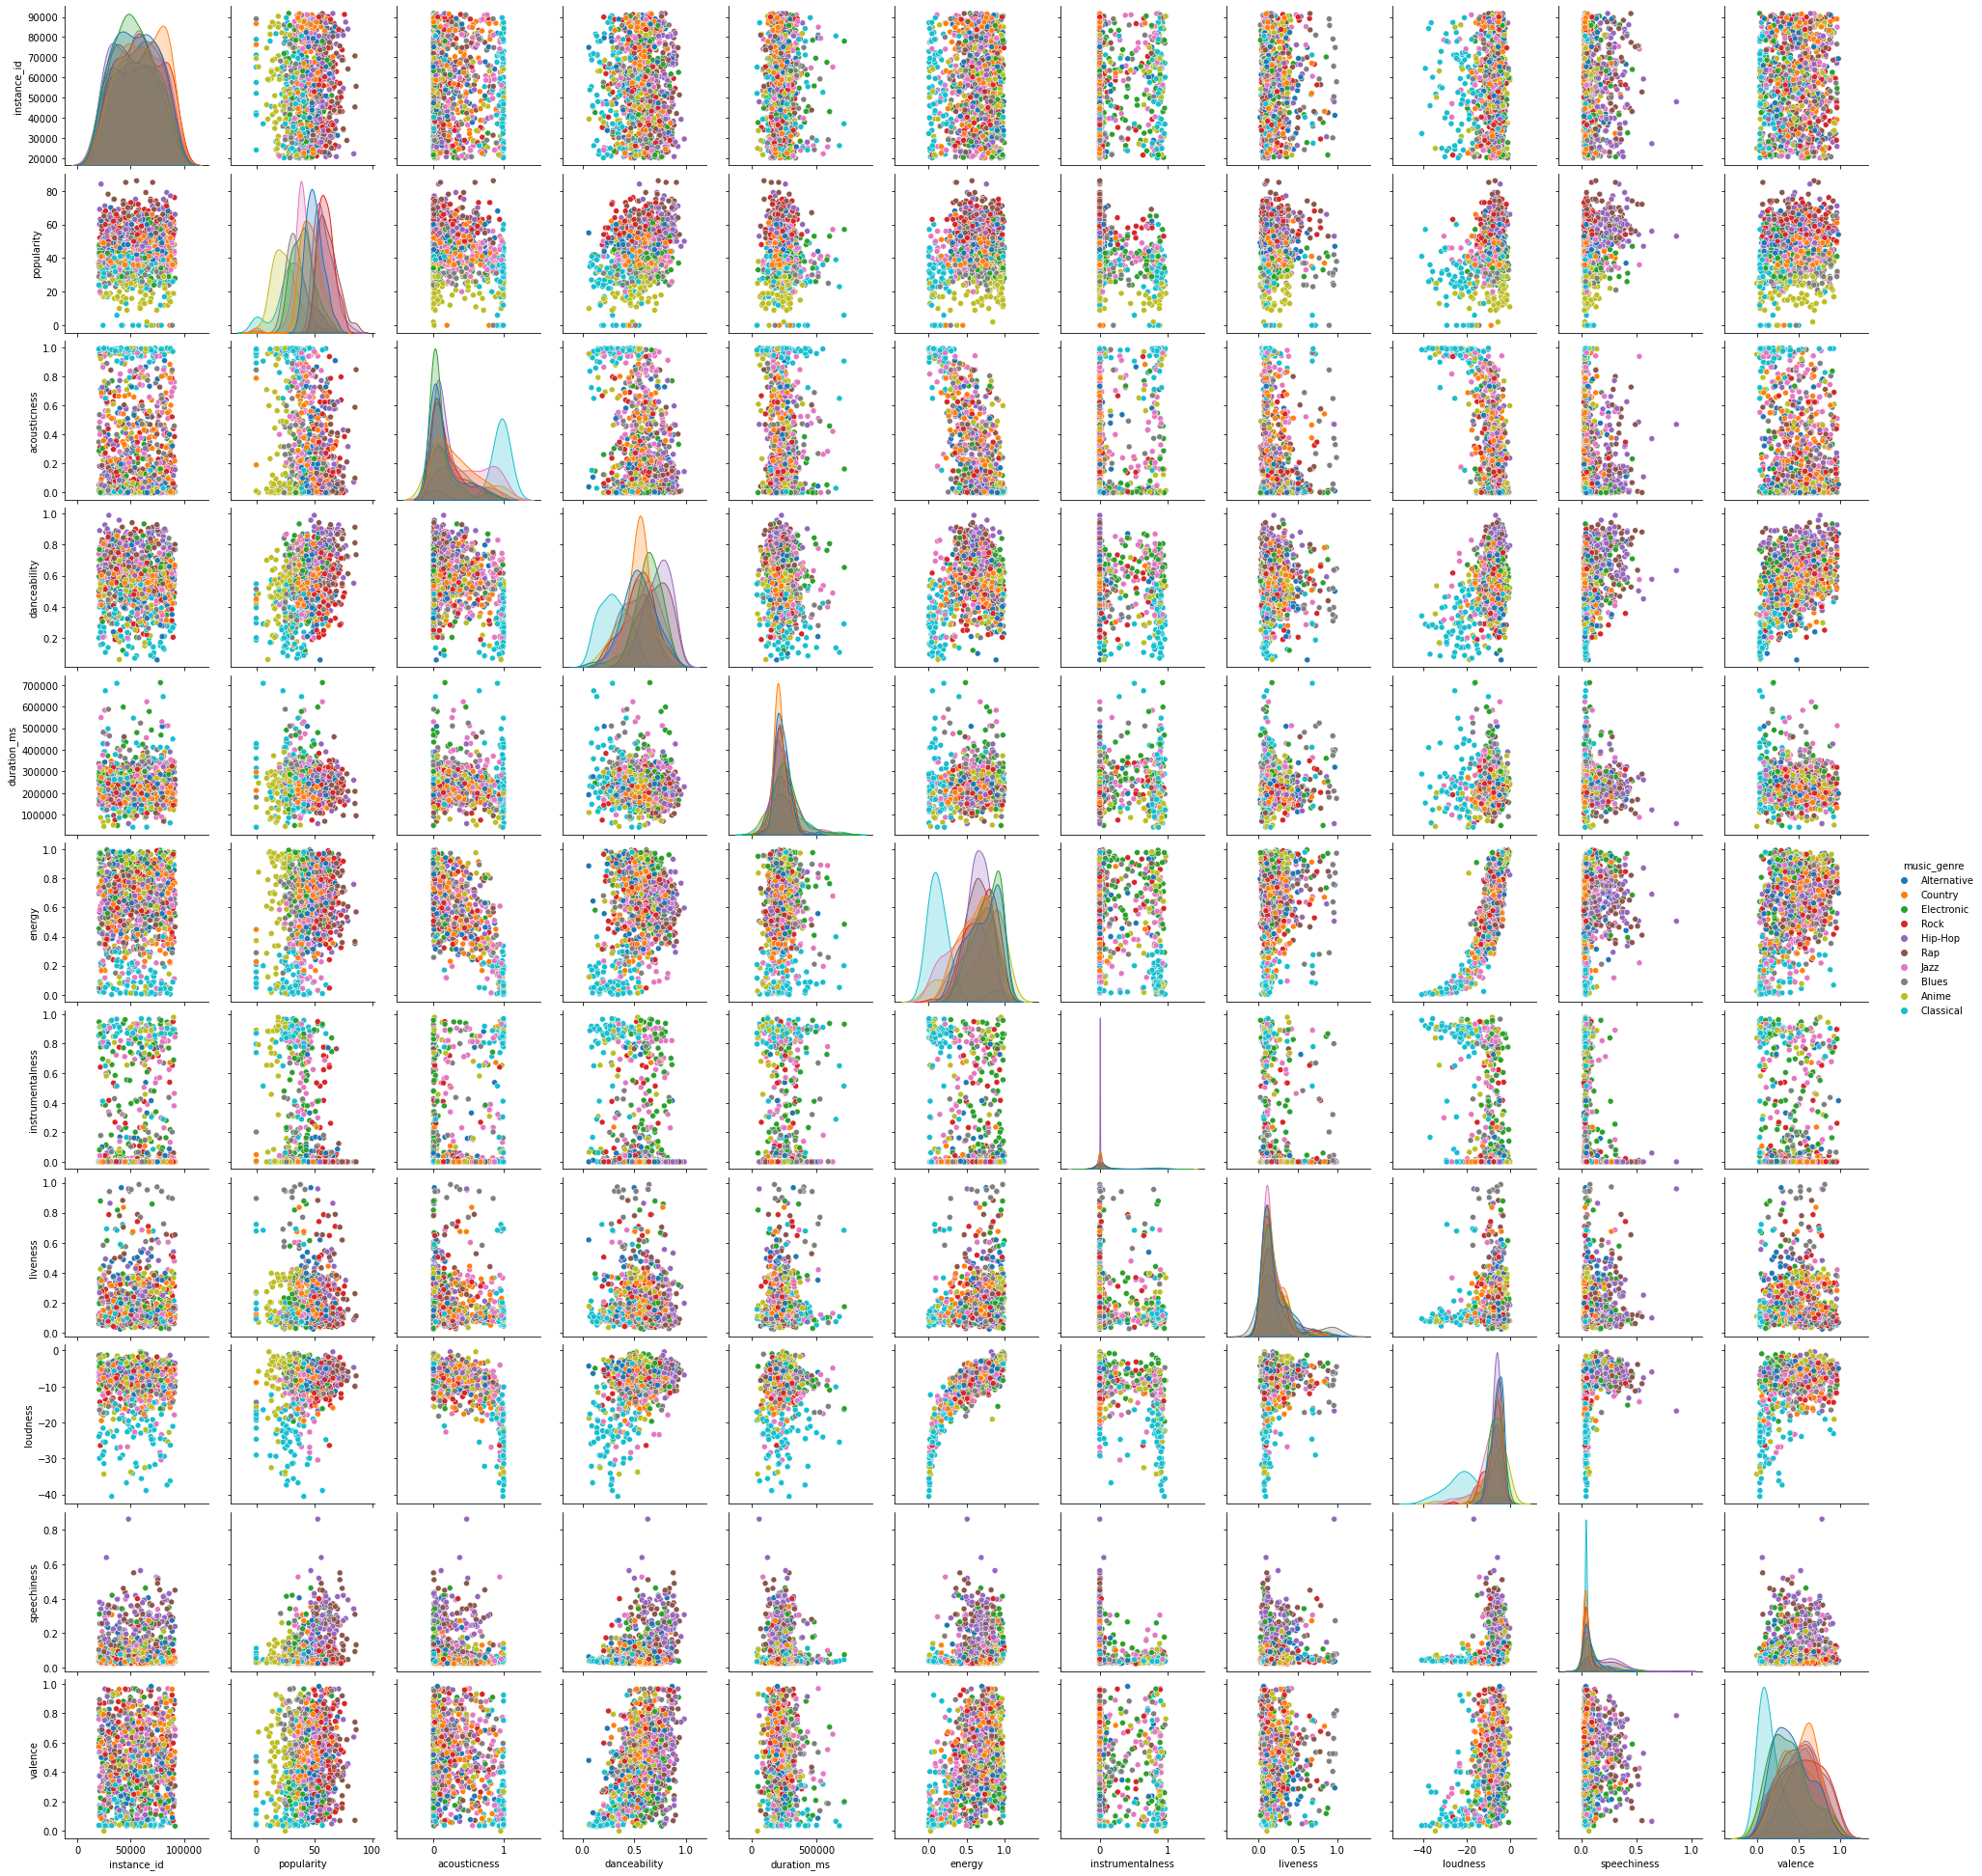

In [17]:
sns.pairplot(data.iloc[random_subset], hue = 'music_genre')
pass

In [18]:
corr_mat = data.corr()
corr_mat

,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
instance_id,1.000000,0.004045,-0.004557,-0.002194,0.003809,0.010612,-0.002989,0.006913,0.006115,-0.005773,0.007318
popularity,0.004045,1.000000,-0.282888,0.351951,-0.092332,0.209442,-0.359847,-0.036768,0.311685,0.224653,0.121749
acousticness,-0.004557,-0.282888,1.000000,-0.338149,0.045285,-0.788956,0.378727,-0.109312,-0.727146,-0.160303,-0.263045
danceability,-0.002194,0.351951,-0.338149,1.000000,-0.176506,0.253718,-0.290835,-0.049148,0.381272,0.276291,0.430601
duration_ms,0.003809,-0.092332,0.045285,-0.176506,1.000000,-0.055076,0.149395,0.027938,-0.103677,-0.118972,-0.164048
energy,0.010612,0.209442,-0.788956,0.253718,-0.055076,1.000000,-0.381785,0.186993,0.836305,0.155608,0.389657
instrumentalness,-0.002989,-0.359847,0.378727,-0.290835,0.149395,-0.381785,1.000000,-0.094722,-0.524886,-0.196859,-0.266339
liveness,0.006913,-0.036768,-0.109312,-0.049148,0.027938,0.186993,-0.094722,1.000000,0.125948,0.116760,0.052336
loudness,0.006115,0.311685,-0.727146,0.381272,-0.103677,0.836305,-0.524886,0.125948,1.000000,0.162635,0.333562
speechiness,-0.005773,0.224653,-0.160303,0.276291,-0.118972,0.155608,-0.196859,0.116760,0.162635,1.000000,0.057543


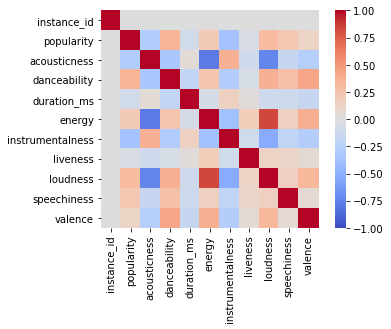

In [19]:
sns.heatmap(corr_mat, square=True, vmin = -1, cmap='coolwarm')
pass

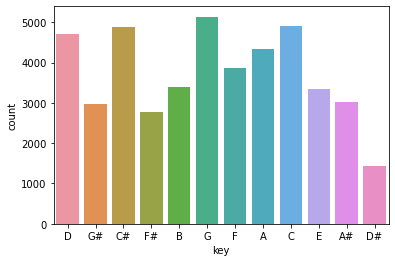

In [20]:
sns.countplot(x='key', data=data)
pass

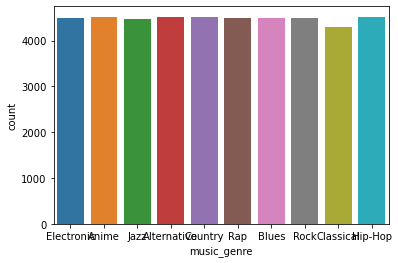

In [21]:
sns.countplot(x='music_genre', data=data)
pass

Классы сбалансированы

# Обработка данных

In [22]:
new_data = data.loc[:, ['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key',
                       'liveness', 'loudness', 'mode', 'speechiness', 'valence', 'music_genre']]

In [23]:
new_data.shape

(44800, 13)

In [24]:
new_data.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,valence,music_genre
1,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,0.531,Electronic
2,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,0.333,Electronic
3,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,0.270,Electronic
4,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,0.323,Electronic
5,47.0,0.00523,0.755,519468.0,0.731,0.85400,D,0.216,-10.517,Minor,0.0412,0.614,Electronic


In [25]:
new_data['mode'] = pd.factorize(new_data['mode'])[0]

In [26]:
new_data.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,valence,music_genre
1,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,0,0.0300,0.531,Electronic
2,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,1,0.0345,0.333,Electronic
3,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,1,0.2390,0.270,Electronic
4,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,1,0.0413,0.323,Electronic
5,47.0,0.00523,0.755,519468.0,0.731,0.85400,D,0.216,-10.517,0,0.0412,0.614,Electronic


In [27]:
key_dummies = pd.get_dummies(new_data['key'])

In [28]:
key_dummies.head()

,A,A#,B,C,C#,D,D#,E,F,F#,G,G#
1,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0
5,0,0,0,0,0,1,0,0,0,0,0,0


In [29]:
new_data = pd.concat((new_data, key_dummies), axis=1)
new_data = new_data.drop(['key'], axis=1)

In [30]:
new_data.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,...,B,C,C#,D,D#,E,F,F#,G,G#
1,31.0,0.01270,0.622,218293.0,0.890,0.95000,0.124,-7.043,0,0.0300,...,0,0,0,1,0,0,0,0,0,0
2,28.0,0.00306,0.620,215613.0,0.755,0.01180,0.534,-4.617,1,0.0345,...,0,0,0,0,0,0,0,0,0,1
3,34.0,0.02540,0.774,166875.0,0.700,0.00253,0.157,-4.498,1,0.2390,...,0,0,1,0,0,0,0,0,0,0
4,32.0,0.00465,0.638,222369.0,0.587,0.90900,0.157,-6.266,1,0.0413,...,0,0,0,0,0,0,0,1,0,0
5,47.0,0.00523,0.755,519468.0,0.731,0.85400,0.216,-10.517,0,0.0412,...,0,0,0,1,0,0,0,0,0,0


In [31]:
new_data.columns

Index(['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'mode', 'speechiness',
       'valence', 'music_genre', 'A', 'A#', 'B', 'C', 'C#', 'D', 'D#', 'E',
       'F', 'F#', 'G', 'G#'],
      dtype='object')

In [32]:
data_stand = (new_data - new_data.mean(axis = 0))/new_data.std(axis = 0)

In [33]:
data_stand.describe()

,A,A#,B,C,C#,D,D#,E,F,F#,...,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,popularity,speechiness,valence
count,4.480000e+04,4.480000e+04,4.480000e+04,4.480000e+04,4.480000e+04,4.480000e+04,4.480000e+04,4.480000e+04,4.480000e+04,4.480000e+04,...,4.480000e+04,4.480000e+04,4.480000e+04,4.480000e+04,4.480000e+04,4.480000e+04,4.480000e+04,4.480000e+04,4.480000e+04,4.480000e+04
mean,-3.565350e-15,-3.889054e-15,-1.521796e-15,3.797515e-15,-8.133078e-16,-7.618165e-15,2.689753e-15,-1.085848e-15,-9.792764e-15,7.486274e-16,...,9.082868e-15,-7.206289e-17,-1.036393e-14,-1.512815e-14,-4.732313e-16,5.382317e-15,2.428897e-14,-6.332732e-16,-1.096404e-14,1.328089e-14
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.270103e-01,-2.689481e-01,-2.867092e-01,-3.508358e-01,-3.494298e-01,-3.429206e-01,-1.820388e-01,-2.843317e-01,-3.077934e-01,-2.566680e-01,...,-2.820177e+00,-2.452533e+00,-2.284880e+00,-5.525099e-01,-1.143591e+00,-6.210914e+00,-1.334741e+00,-2.859873e+00,-7.039448e-01,-1.861595e+00
25%,-3.270103e-01,-2.689481e-01,-2.867092e-01,-3.508358e-01,-3.494298e-01,-3.429206e-01,-1.820388e-01,-2.843317e-01,-3.077934e-01,-2.566680e-01,...,-6.473959e-01,-5.898092e-01,-6.283209e-01,-5.525099e-01,-6.005402e-01,-2.779523e-01,-1.334741e+00,-6.663481e-01,-5.680665e-01,-8.019290e-01
50%,-3.270103e-01,-2.689481e-01,-2.867092e-01,-3.508358e-01,-3.494298e-01,-3.429206e-01,-1.820388e-01,-2.843317e-01,-3.077934e-01,-2.566680e-01,...,5.732034e-02,-1.629045e-01,1.653851e-01,-5.520633e-01,-4.139887e-01,2.986085e-01,7.491926e-01,4.332184e-02,-4.410499e-01,-3.052481e-02
75%,-3.270103e-01,-2.689481e-01,-2.867092e-01,-3.508358e-01,-3.494298e-01,-3.429206e-01,-1.820388e-01,-2.843317e-01,-3.077934e-01,-2.566680e-01,...,7.169347e-01,3.893858e-01,8.147808e-01,-1.167430e-01,3.135619e-01,6.396139e-01,7.491926e-01,7.529918e-01,5.224709e-02,7.733596e-01
max,3.057939e+00,3.718106e+00,3.487776e+00,2.850273e+00,2.861741e+00,2.916062e+00,5.493213e+00,3.516940e+00,3.248860e+00,3.895996e+00,...,2.402616e+00,5.882779e+00,1.505951e+00,2.525673e+00,5.014658e+00,2.095879e+00,7.491926e-01,3.527156e+00,8.351650e+00,2.165947e+00


# Отбор признаков

In [34]:
X = data_stand.drop(['music_genre'], axis=1)
y = new_data['music_genre']

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(35840, 8960)

# Метод kNN

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

## k = 5

In [52]:
knn5 = KNeighborsClassifier(n_neighbors = 5)
knn5.fit(X_train,y_train)
y_train_pred = knn5.predict(X_train)
y_test_pred = knn5.predict(X_test)

In [53]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_pred, y_test))

[[338  52  79  28 156 125  81  63  79 222]
 [ 17 588 114  70  28  93   2  43   0   3]
 [ 29  92 404  27  97  57   2 136   2  29]
 [  5  80  12 653   6  12   0  77   0  10]
 [151  37 138  10 405  60  32  66  36 165]
 [ 58  41  39  13  15 423  12 109  10  12]
 [ 85   0   7   0  19  37 390  33 438  37]
 [ 39  28  76  33  41  97   9 331  11  31]
 [ 59   0   4   0  18  24 352  13 240  62]
 [118   7  33   2  95  12  35  16  75 310]]


In [54]:
from sklearn.metrics import plot_confusion_matrix

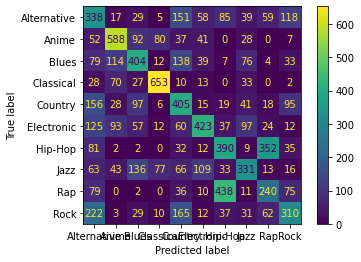

In [55]:
plot_confusion_matrix(knn5, X_test, y_test)

In [56]:
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
print("Train: ", train_acc)
print("Test: ",  test_acc)

Train:  0.6275948660714286
Test:  0.45558035714285716


## k = 10

In [57]:
knn10 = KNeighborsClassifier(n_neighbors = 10)
knn10.fit(X_train,y_train)
y_train_pred = knn10.predict(X_train)
y_test_pred = knn10.predict(X_test)

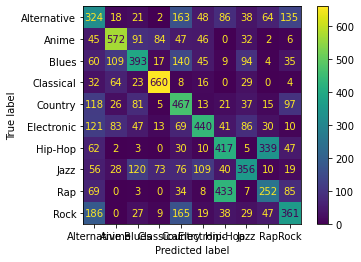

In [58]:
plot_confusion_matrix(knn10, X_test, y_test)

In [59]:
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
print("Train: ", train_acc)
print("Test: ",  test_acc)

Train:  0.5825892857142857
Test:  0.4734375


## k = 1

In [60]:
knn1 = KNeighborsClassifier(n_neighbors = 1)
knn1.fit(X_train,y_train)
y_train_pred = knn1.predict(X_train)
y_test_pred = knn1.predict(X_test)

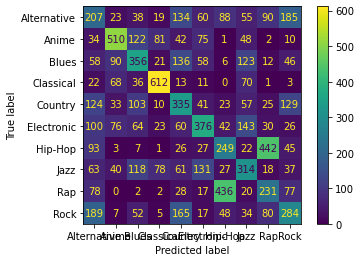

In [61]:
plot_confusion_matrix(knn1, X_test, y_test)

In [62]:
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
print("Train: ", train_acc)
print("Test: ",  test_acc)

Train:  0.9640904017857143
Test:  0.38772321428571427


## k = 20

In [63]:
knn20 = KNeighborsClassifier(n_neighbors = 20)
knn20.fit(X_train,y_train)
y_train_pred = knn20.predict(X_train)
y_test_pred = knn20.predict(X_test)

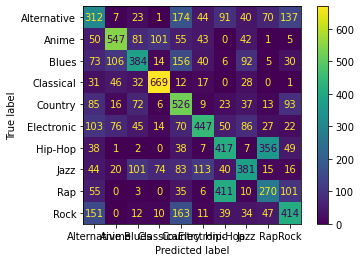

In [64]:
plot_confusion_matrix(knn20, X_test, y_test)

In [65]:
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
print("Train: ", train_acc)
print("Test: ",  test_acc)

Train:  0.553125
Test:  0.48738839285714286


## k = 50

In [66]:
knn50 = KNeighborsClassifier(n_neighbors = 50)
knn50.fit(X_train,y_train)
y_train_pred = knn50.predict(X_train)
y_test_pred = knn50.predict(X_test)

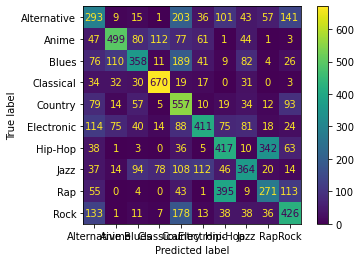

In [67]:
plot_confusion_matrix(knn50, X_test, y_test)

In [68]:
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
print("Train: ", train_acc)
print("Test: ",  test_acc)

Train:  0.5196707589285714
Test:  0.47611607142857143
